# SKLearn KMeans Demo & Analysis:

## Importing data:

In [92]:
import pandas as pd

df = pd.read_csv('./housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [93]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Checking data:

In [96]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [97]:
df = df.dropna(subset=['total_bedrooms'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Standardizing data:

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['longitude', 'latitude', 'median_income']

X = df[features]

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [106]:
X.sample(5)

,longitude,latitude,median_income
17352,-1.167596,0.798943,-0.561782
19863,0.264877,0.148284,-1.066193
14588,1.273098,-1.326231,0.309143
2457,-0.254207,0.330843,-0.924505
19781,0.244912,0.265309,-0.745434


## Testing KMeans from sklearn

In [109]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
kmeans = KMeans(n_clusters=6)

features = ['longitude', 'latitude', 'median_income']

kmeans.fit(X)

KMeans(n_clusters=6)

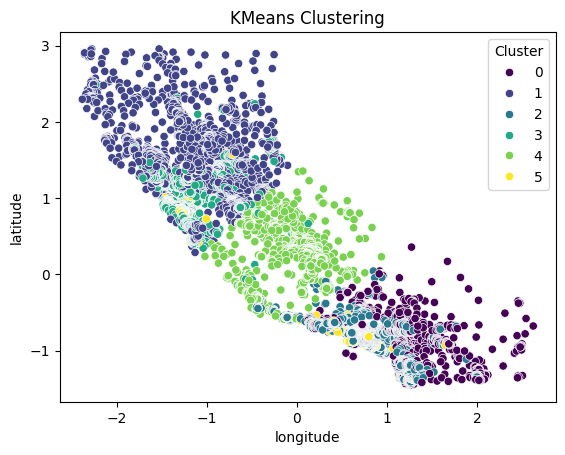

In [113]:
X.loc[:, 'Cluster'] = kmeans.labels_

sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=X, palette='viridis', legend='full')

plt.title('KMeans Clustering')
plt.show()

# Custom KMeans Implementation

In [116]:
from pandas import DataFrame
import numpy as np
import math

class KMean:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self._centroid_list = []
        
    def calculate_distance(self, centroid: list, second: list):
        total = sum([(left - right)**2 for left, right in zip(centroid, second)])
        return math.sqrt(total)
    
    def fit(self, X: DataFrame):
        #create n labels
        #create n centers (k) with same number of features of X
        _, n_features = X.shape
        centroids = [[np.random.uniform(1,3) for _ in range(n_features)] for _ in range(self.n_clusters)]
        #for each k create a list
        
        for _ in range(100):
            datapoints_dict = {idx : [] for idx in range(self.n_clusters)}
            self._centroid_list = []
        #moving datapoints:
            #for X length times
            for idx, row in X.iterrows():
                x = row.to_list()
                if(len(x) <= 0):
                    continue
                closest_centroid = 0
                distance_closest_centroid = self.calculate_distance(centroids[0], x)
                #go through each X and measure distance between it and all k
                for idx, centroid in enumerate(centroids):
                    if(idx == 1):
                        continue
                    distance_centroid = self.calculate_distance(centroid, x)
                    if(distance_centroid < distance_closest_centroid):
                        closest_centroid = idx
                        distance_closest_centroid = distance_centroid
                        
                self._centroid_list.append(closest_centroid)    
                #put single X in list of closest k
                datapoints_dict[closest_centroid].append(x)
            #updating centroids:
            #for each feature in X, update corrosponding centroid and make it the mean of the current feature column
            for idx in range(self.n_clusters):
                if(len(datapoints_dict[idx]) > 0):
                    column_means = np.mean(np.array(datapoints_dict[idx]), axis=0)
                    centroids[idx] = column_means.tolist()
                else:
                    centroids[idx] = [np.random.uniform(1,3) for _ in range(n_features)]
                
    

In [117]:
kmean = KMean(n_clusters=6)

kmean.fit(X)

In [118]:
print(len(kmean._centroid_list))

20433


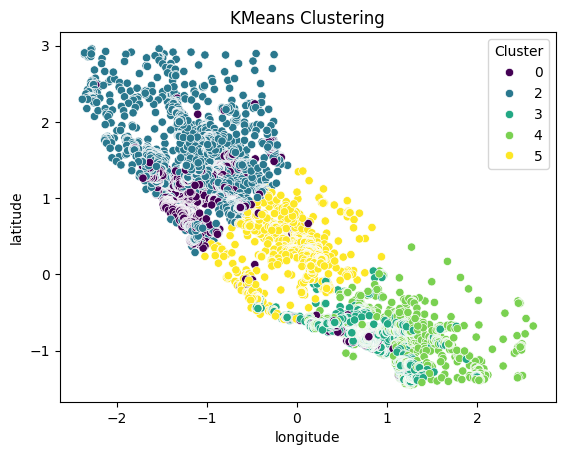

In [120]:
X.loc[:, 'Cluster'] = pd.Series(kmean._centroid_list)

sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=X, palette='viridis', legend='full')


plt.title('KMeans Clustering')
plt.show()

The code takes over a minute to run, which is due to definition of custom euclidean distance function, and iterating through each row for each iteration of the algorithm. This can be solved by using Numpy's vectorized distance calculation.